# Attrition clients bancaire
#### Churn for Bank Customers

Les données ont été récupérés depuis "Kaggle", et "copier/coller" tel quel, c'est pour cela que la présentation de la problématique est en anglais mais le reste de l'analyse sera détaillée en Français.


### Predict customer churn in a bank

source : https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?resource=download

### A propos des données (About the dataset) : 

##### Content
RowNumber —corresponds to the record (row) number and has no effect on the output. <br>
CustomerId—contains random values and has no effect on customer leaving the bank. <br>
Surname—the surname of a customer has no impact on their decision to leave the bank. <br>
CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank. <br>
Geography—a customer’s location can affect their decision to leave the bank. <br>
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank. <br>
Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones. <br>
Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank. <br>
Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. <br>
NumOfProducts—refers to the number of products that a customer has purchased through the bank. <br>
HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. <br>
IsActiveMember—active customers are less likely to leave the bank. <br>
EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. <br>
Exited—whether or not the customer left the bank. <br>

##### Acknowledgements
As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company. <br>

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# 1) Problématiques 

La problématique mise en avant concerne un problème de <b>"churn"</b>, également appelé <b>"customer attrition"</b> en anglais, soit l'attrition client en français (ou taux de perte de clients).
Sur internet, nous pouvons trouver une définition de l'attrition : <br> 
``"L'attrition est une notion marketing qui se caractérise par l'abandon d'une marque, d'un produit ou d'un service de la part de clients existants"``

Sur Kaggle, il est également indiqué <b>qu'il peut être plus coûteux de trouver de nouveau client plutôt que de garder un client déjà existant</b>. Le "plus coûteux" n'est pas forcément une problématique économique mais aussi d'énergie / d'effort pour les conseillers bancaires, pour attirer de nouveau client, du fait entre autre de l'exigence des clients sur les attentes qu'ils ont de leur banque. Un article de la BPCE parle des ``"4 tendances clés qui changent l'expérience client dans le secteur bancaire"`` (https://blogrecrutement.bpce.fr/4-tendances-cles-changent-experience-client-dans-secteur-bancaire) 

# 2) Analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./data/churn.csv', index_col='RowNumber')

In [3]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Analyse rapide (voir ci-dessous)

- Nous observons que l'âge moyen des clients est de ~39 ans (minimum de 18 ans et maximum de 92 ans)
- Nous observons qu'en moyenne les clients possèdent 76 486€ sur leur compte (minimum de 0€ et maximum de 250 898€) <br>
(nous pouvons déjà faire une hypothèse en notant que les clients possédants "0€" sur leur compte bancaire, peut signifier qu'ils ont une utilisation "secondaire" de ce compte bancaire, ou qu'ils sont de nouveaux clients donc pas encore pris le temps de basculer leur épargne sur ce nouveau compte bancaire)
- Nous observons un salaire annuel estimé de 100 090€ (minimum de 11.58€ et un maximum de 199 992€)
- Nous observons également qu'il y a 20% de client ayant churn dans ce dataset

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [5]:
data.isnull().values.sum()

0

In [6]:
data.isna().values.sum()

0

Nous pouvons également afficher la répartition des valeurs au sein des différentes colonnes de nos données en faisant ``data.hist`` <br>
Nous observons très rapidement le déséquilibre de nos données au niveau de colonne ``Exited`` qui est notre target variable. C'est une répartition 80/20. <br>
Il y a aussi un grand nombre de compte avec une ``Balance`` de 0, c'est à dire des comptes qui n'ont pas d'argent dessus. Cela peut être dû au fait que les clients n'utilisent pas cette banque en tant que banque principale.

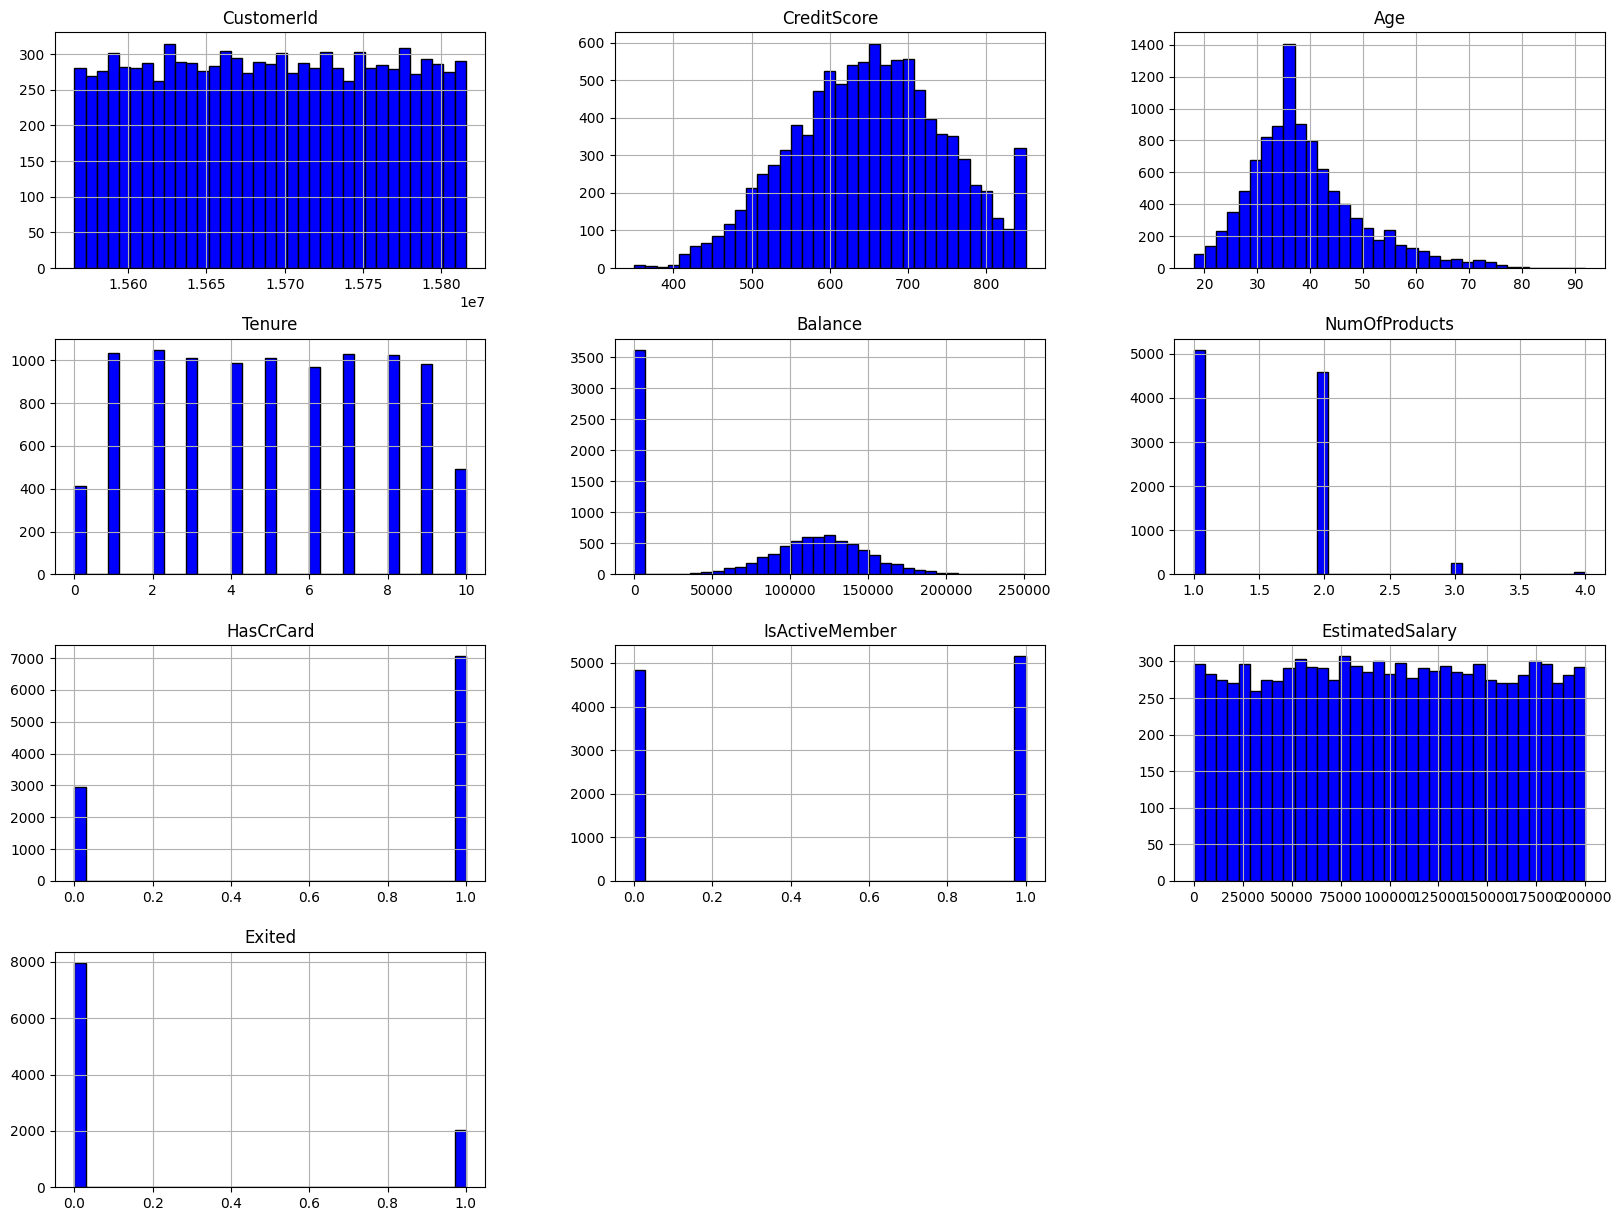

In [7]:
data.hist(bins=35, figsize=(20,15), color='blue',edgecolor='black')
plt.show()

# 3) Exploration et pre-processing

Tout d'abord on découpe notre jeu de données en ``trainset`` et ``testset``. <br>
Nous allons dans un premier temps travailler exclusivement sur le "trainset", et ne pas du tout regarder le testset.
Notre objectif est de préparer des fonctions de "pre-processing" à notre trainset que l'on pourra également appliquer à notre testset par la suite.

Sur nos données, il y a plusieurs actions de préparation de données qui vont pouvoir être fait : 

- Effectuer des actions sur les données "null" (compléter ou supprimer ces valeurs) : Non présente dans ce jeu de données (voir ci-dessus)
- Supprimer les colonnes non utiles : par exemple, la colonne ``CustomerId`` doit être un numéro client unique au niveau de la base de données de la banque. Je ne pense pas que cette information a un grand intérêt d'être conservé au sein de nos données.
- Compléter les données via les informations présentes : par exemple, nous avons le pays de résidence du client via la colonne ``Geography``. Au sein de l'union européénne, les pays n'ont pas forcément le même salaire médian, le même "SMIC", le même PIB... Cela peut être des informations intéressantes à rajouter pour donner du contexte aux données et rajouter des précisions en lien avec le salaire estimé du client...

Depuis les données de : https://datacommons.org/place/country/FRA?hl=fr
<br>Les chiffres sont pour l'année 2021, et en milliard de dollars.

Nous pouvons effectuer la même approche pour rajouter le salaire minimum (le SMIC) sur ces différents pays afin de mettre en relief les salaires estimés des différents clients. Un salaire ne veut pas forcément dire la même chose d'un pays à l'autre en fonction du coût de la vie dans ce pays, mais également par rapport à son salaire minimum. <br>
Le salaire minimum de chaque pays européen est très facilement récupérable à partir du site : https://ec.europa.eu/eurostat/databrowser/view/earn_mw_cur/default/table?lang=fr

Tout d'abord, on créé une nouvelle colonne ``SMIC_2023`` avec des valeurs par défauts, qui se fait très rapidement avec numpy et la méthode ``"zeros"``. <br>
Cette nouvelle colonne doit être de la longueur de notre jeu de données ce qui se traduit par "len(data)" en python.

Maintenant, on peut également transformer la colonne ``"Gender"`` qui pour le moment correspond à "Male" ou "Female" en 0 ou 1.

A la fin de ce traitement, on peut maintenant transformer notre colonne "Geography" en "dummies", c'est à dire "éclater" la colonne "Geography" en plusieurs colonne par valeur unique de cette colonne, avec comme valeur un 0 ou 1

Après avoir modifié/complété nos données, nous pouvons désormais supprimer les colonnes qui ne seront pas utiles dans le modèle. <br>
Comme dit précédemment, il n'est pas nécessaire de garder le ``"CustomerId"``, qui est un id unique qui ne doit normalement pas apporter d'information sur le fait que le client va quitter ou non sa banque. Nous pouvons également supprimer la colonne ``Surname`` qui n'aura normalement pas d'impact sur le modèle, pour la même raison que la colonne ``CustomerId``

### Création de fonctions permettant de faire du pre-processing sur nos données

In [8]:
def _geo_data_augmentation(data):
    '''Sur nos données, permet de rajouter une colonne PIB_2021 avec les données du PIB sur 2021 pour les
    pays présents dans la colonne Geography, c est a dire pour allemagne, france et espagne.
    Nous ferons la même manipulation pour la valeur du SMIC, qui peut différencier d'un pays européen à un autre.'''
    
    if 'Geography' not in data.columns:
        print("Impossible de rajouter les colonnes : La colonne Geography n'existe pas ou n'est plus présente")
        return
    
    data['PIB_2021'] = np.zeros((len(data),1))
    
    conditions = [
    data['Geography'] == 'France',
    data['Geography'] == 'Germany',
    data['Geography'] == 'Spain'
    ]

    valeurs = [2958,4260,1427]
    
    data['PIB_2021'] = np.select(conditions,valeurs)
    
    data['SMIC_2023'] = np.zeros((len(data),1))
    conditions = [
    data['Geography'] == 'France',
    data['Geography'] == 'Germany',
    data['Geography'] == 'Spain'
    ]

    valeurs = [1709.28,1987,1166.67]
    
    data['SMIC_2023'] = np.select(conditions,valeurs)
    
    return data

In [9]:
def _gender_convertor(data):
    '''Sur nos données, permet de convertir la colonne "Gender" en 0 ou 1 au lieu de "Female" et "Male"'''
    if 'Gender' in data.columns:
        data['Gender'] = data['Gender'].map({'Female':0,'Male':1})
    else:
        print("Transformation impossible : la colonne 'Gender' n'existe pas ou a été renommée")
    return data

In [10]:
standard_scaler = StandardScaler()

def _standard_scaled(data,standardscaler):
    '''Fonction qui applique la fonction "StandardScaler" de sklearn permettant de centrer et réduire nos valeurs
    c'est à dire une moyenne de 0 et un écart type de 1'''
    col_a_centrer = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','SMIC_2023','PIB_2021']
    standardscaler.fit(data[col_a_centrer])
    data[col_a_centrer] = standardscaler.transform(data[col_a_centrer])
    data.head()
    return data

In [11]:
def _invert_standard_scaled(data,standardscaler):
    col_a_centrer = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','SMIC_2023','PIB_2021']
    data[col_a_centrer] = standardscaler.inverse_transform(data[col_a_centrer])
    return data

In [12]:
def _dummies_geo_transformation(data):
    '''Sur nos données, permet d'effectuer une transformation de la colonne Geography en dummies variables'''
    if 'Geography' in data.columns:
        data = pd.get_dummies(data,columns=['Geography'])
    else:
        print("Impossible de convertir en dummy les données Geography car la colonne n'est pas présente ou a été renommée !")
    return data

In [13]:
def preprocessing(data):
    '''Permet d'effectuer toutes les transformations de pre-processing qui ont été définies juste avant
    puis supprime les colonnes qui ne seront pas utiles dans notre modèle et isole la target variable.
    Cette fonction de preprocessing retour un X (feature variables) et un y (target variable) en fonction des données d'entrées'''
    
    data = _geo_data_augmentation(data)
    data = _gender_convertor(data)
    data = _standard_scaled(data,standard_scaler)
    data = _dummies_geo_transformation(data)
    
    to_remove = ['CustomerId', 'Surname']
    data = data.drop(columns=to_remove)
    
    y = data['Exited']
    X = data.drop('Exited',axis=1)
    
    print(y.value_counts())
    
    return X, y

In [14]:
data = pd.read_csv('./data/churn.csv', index_col='RowNumber')
features, target = preprocessing(data)

0    7963
1    2037
Name: Exited, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=26)

# 4) Choix du/des modèles

Le problème de churn est un problème de ``classification``. En effet, nous avons ici pour objectif de déterminer si un client va quitter ou non sa banque, il faut donc classer en "quitte la banque" correspondant à la classe ``1`` ou "ne quitte pas la banque" correspondant à la classe ``0``, en fonction d'un historique connu de client qui ont déjà quitté la banque.

<b>A noter :</b> Les clients qui seront ciblés par le modèle pourront être par exemple, appeler par un conseiller ou un centre d'appel afin de proposer aux clients de faire un point approfondi afin de comprendre leur besoin actuel, ou encore, proposer une offre intéressante au client afin de la garder au sein de son établissement bancaire. <br>
Il est donc important de comprendre ici qu'il est très important de maximiser la prédiction des "1" ("je quitte la banque"), même si nous prenons un peu plus large que la réalité. Dans un cas comme celui-ci, il faut mieux faire des propositions commerciales avantageuses "plus large", à un plus grand nombre client, plutôt que de prendre le risque de les perdre. <br>
Vous l'aurez donc compris, le modèle que je sélectionnerai sera celui qui "capte" bien les 1. <br>
Les modèles que je vais utiliser sont : les ``Arbres de décisions``, ``Forêts aléatoires`` et ``Gradient Boosting``.
<br>
Après réflexion, j'ai également rajouté l'algorithme ``Ada Boost``qui peut être très intéressant dans notre cas. En effet, l'algorithme "Ada Boost" fonctionne à partir des arbres de décisions. Comme tout algorithme de ``Boosting``, l'ensemble des différents arbres qui sont générés ont pour objectif de corriger les erreurs de l'arbre précédent.  Il a la particularité de donner à chaque itération un poid plus important aux meilleurs arbres, en mettant en avant qu'il faut "d'avantage écouter" les performances des bons modèles plutôt que des mauvais, au lieu de considérer que tous les arbres annexes ont le "même poid".

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import seaborn as sns

Pour le moment, j'utilise les différents modèles ``sans toucher aux hyper paramètres`` pour déjà se donner une idée du modèle qui a la meilleure performance sur notre cas d'usage 

In [17]:
decision_tree = DecisionTreeClassifier(random_state=26)
random_forest = RandomForestClassifier(random_state=26)
gradient_boost = GradientBoostingClassifier(random_state=26)
ada_boost = AdaBoostClassifier(random_state=26)

In [18]:
def evaluation(model,my_X_train,my_y_train):
    '''A partir d'un modèle ML (decision tree, random forest, xgboost etc...) permet de
    - lancer un "fit" sur nos données d'entrainement (X_train)
    - lancer un "predict" sur nos données de test (X_test)
    Suite à ces actions, affiche des métriques permettant d'évaluer notre modèle. Ces métriques sont : 
    - le score global
    - la matrice de confusion
    - le ROC AUC (Area Under the Curve)
    - un tableau résumé de la prédiction (via le "classification_report")
    - affiche la "learning curve" (courbe d'apprentissage) permettant d'évaluer la performance du modèle en fonction
    du nombre de données
    - affiche une courbe ROC permettant de visualiser le taux de "Vrai Positif" et "Faux Positif"
      '''
    model.fit(my_X_train,my_y_train)
    ypred = model.predict(X_test)
    ypred_proba = model.predict_proba(X_test)
    
    print("Le score global du modèle est : \n" + str(model.score(X_test,y_test)) + "\n")
    print("La matrice de confusion : \n" + str(confusion_matrix(y_test,ypred))+ "\n")
    print("ROC AUC Score : " + str(roc_auc_score(y_test,ypred)) + "\n")
    print("Reporting de prédiction : \n" + str(classification_report(y_test,ypred))+ "\n")
    false_positive_rate, true_positive_rate, seuil = roc_curve(y_test,ypred_proba[:, 1])
    auc = roc_auc_score(y_test,ypred_proba[:, 1])
    N, train_score, val_score = learning_curve(model, my_X_train, my_y_train,cv=5,scoring='f1',random_state=26)
    plt.figure(figsize=(10, 10))
    plt.subplot(321)
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='validation score')
    plt.ylabel('Score')
    plt.xlabel('Quantité données')
    plt.title("Learning Curve (Courbe d'apprentissage)")
    plt.legend()
    plt.subplot(322)
    plt.plot(false_positive_rate,true_positive_rate,label="AUC="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("Courbe ROC")
    plt.legend(loc=4)
    plt.subplot(323)
    cf_matrix = confusion_matrix(y_test,ypred)
    sns.heatmap(cf_matrix, annot=True,fmt=".1f", cmap='Blues')
    pd.DataFrame(model.feature_importances_,index=X_test.columns,columns=['feature_imp']).sort_values(by='feature_imp', ascending=False).plot.bar(color='green',figsize=(6,4))
    return ypred

Le score global du modèle est : 
0.792

La matrice de confusion : 
[[2085  329]
 [ 295  291]]

ROC AUC Score : 0.6801493562862821

Reporting de prédiction : 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2414
           1       0.47      0.50      0.48       586

    accuracy                           0.79      3000
   macro avg       0.67      0.68      0.68      3000
weighted avg       0.80      0.79      0.79      3000




array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

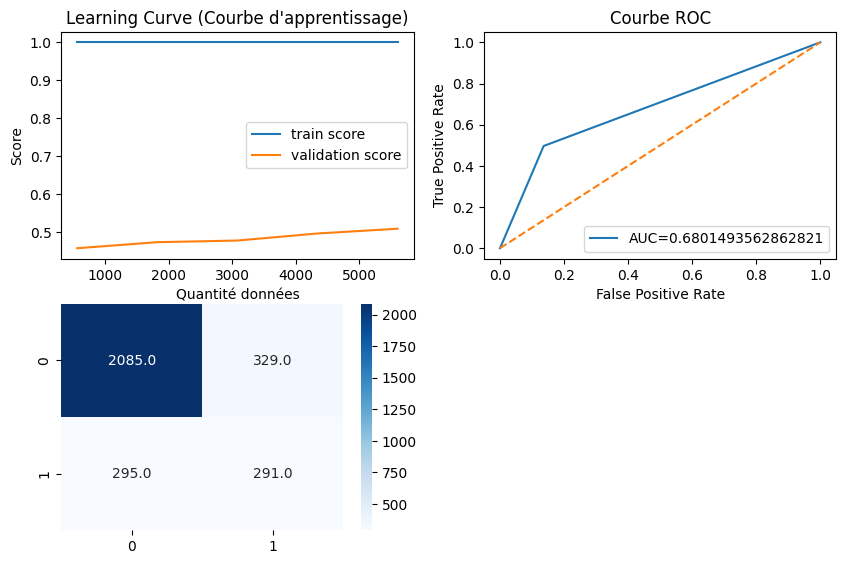

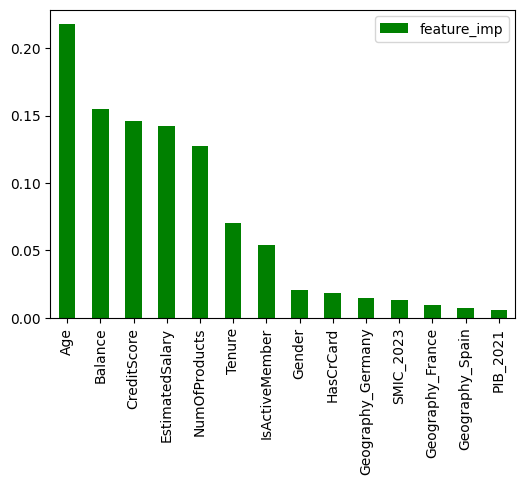

In [19]:
evaluation(decision_tree, X_train, y_train)

Le score global du modèle est : 
0.8713333333333333

La matrice de confusion : 
[[2325   89]
 [ 297  289]]

ROC AUC Score : 0.7281528964996563

Reporting de prédiction : 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2414
           1       0.76      0.49      0.60       586

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000




array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

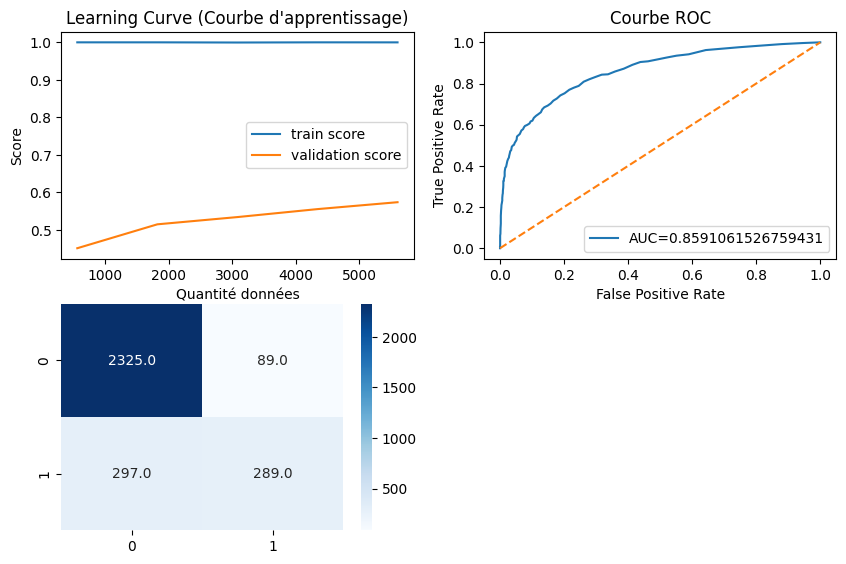

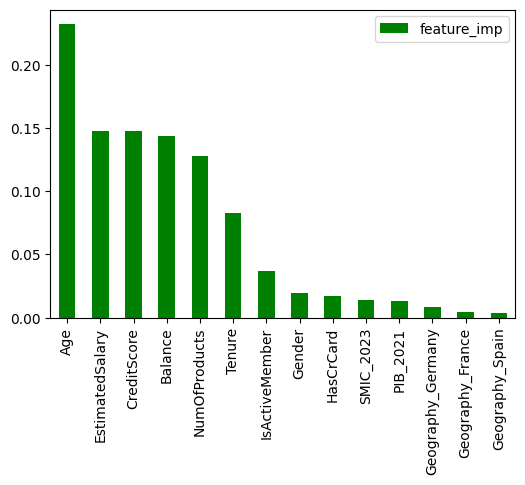

In [20]:
evaluation(random_forest,X_train,y_train)

Le score global du modèle est : 
0.8543333333333333

La matrice de confusion : 
[[2290  124]
 [ 313  273]]

ROC AUC Score : 0.7072516407418613

Reporting de prédiction : 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2414
           1       0.69      0.47      0.56       586

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000




array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

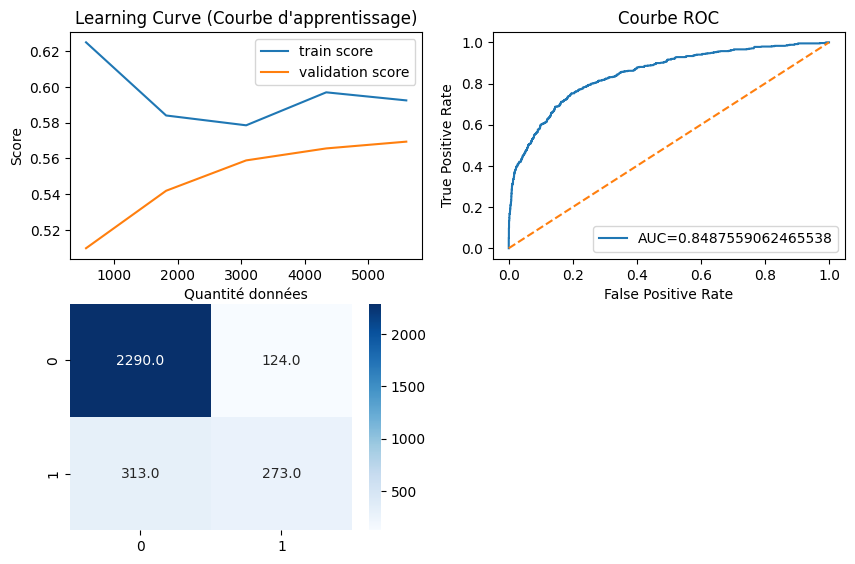

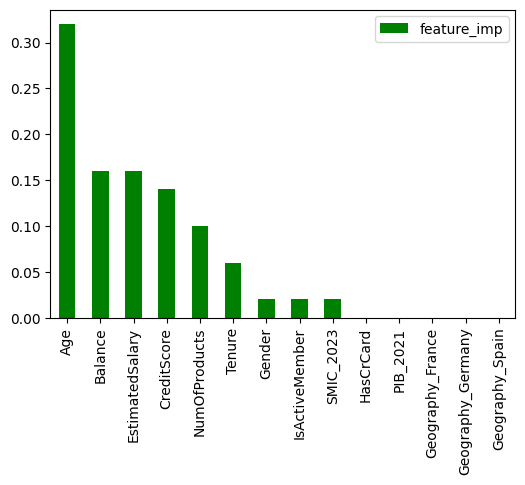

In [21]:
evaluation(ada_boost,X_train,y_train)

### Premiers résultats

Nous observons des premiers résultats intéressants, mais ne répondant pas vraiment à notre problématique.
En effet, dans ces différents modèles, notre recall est très mauvais (~0.5 en moyenne), qui est pourtant la mesure qui nous intéresse. Le recall permet de mesure ``le coût des faux négatifs``, c'est à dire ceux passés au travers des "mailles du filet", et qui n'ont pas été détectés.
Dans ce genre de problématique, il est intéressant de maximiser "la capture" des clients qui souhaitent potentiellement partir plutôt que l'inverse, puisque l'on considère qu'un départ du client de notre banque est une perte que l'on souhaite éviter.

### Une solution : le suréchantillonnage

Avant de poursuivre dans la phase d'entrainement du modèle et de sélection des meilleurs hyperparamètres, je vais utiliser une technique de suréchantillonnage afin de résoudre (en partie) le problème de déséquilibre qu'il peut avoir dans les données.
Il y a dans les données une répartition de 80 / 20 entre les personnes ayant quitté et non quitté la banque.
En effet, en regardant de plus près les résultats de nos modèles (sans les avoir "configuré" précisément avec les hyperparamètres), on se rend compte rapidement que le "recall" reste faible c'est à dire que l'on capte pas bien les vrais positifs (les clients qui quittent la banque). Nous pouvons le visualiser comme un trou dans la raquette, c'est à dire, des clients qui vont rééllement quitter la banque dans les jours/mois à venir mais qui au final sont "classés" comme restant.
Ce qui peut être un vrai problème puisqu'ici il faut mieux "prendre le risque" d'augmenter les faux positifs ce qui se résumérait à vouloir récupérer un client qui n'a pas la volonté de partir, plutôt que de rater ceux qui veulent vraiment partir.
<br>
D'où la mise en place de cette étape de "suréchantillonnage" pouvant être une solution pour remédier en partie à ce "trou dans la raquette".

In [32]:
from imblearn.over_sampling import SMOTENC

In [163]:
data = pd.read_csv('./data/churn.csv', index_col='RowNumber')

In [164]:
target = data['Exited']
features = data.drop('Exited',axis=1)

In [165]:
to_remove = ['CustomerId', 'Surname']
features = features.drop(columns=to_remove)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=26)

In [167]:
os_smote = SMOTENC(k_neighbors=5,random_state=26,categorical_features=[1,2], sampling_strategy='auto')

In [168]:
X_res, y_res = os_smote.fit_resample(X_train, y_train)

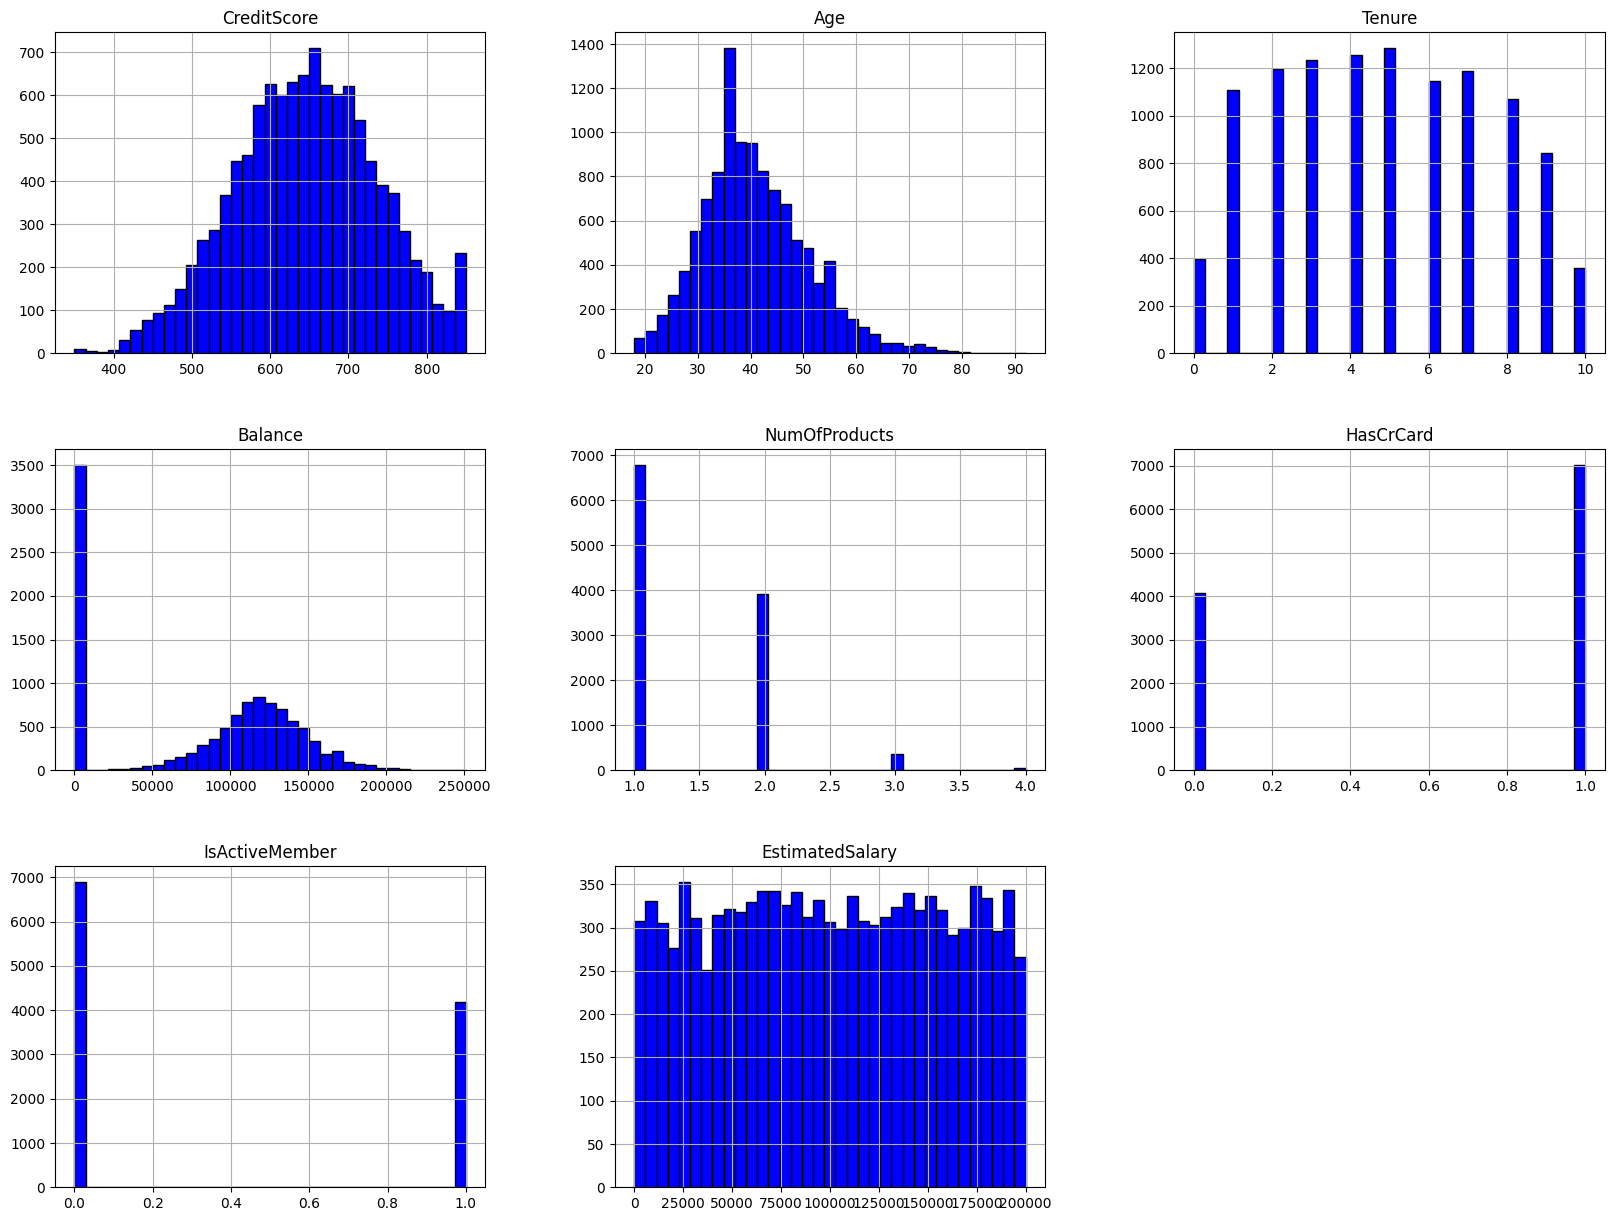

In [66]:
X_res.hist(bins=35, figsize=(20,15), color='blue',edgecolor='black')
plt.show()

In [169]:
standard_scaler = StandardScaler()
X_res = _geo_data_augmentation(X_res)
X_res = _gender_convertor(X_res)
X_res = _standard_scaled(X_res,standard_scaler)
X_res = _dummies_geo_transformation(X_res)

X_test = _geo_data_augmentation(X_test)
X_test = _gender_convertor(X_test)
X_test = _standard_scaled(X_test,standard_scaler)
X_test = _dummies_geo_transformation(X_test)

Le score global du modèle est : 
0.7886666666666666

La matrice de confusion : 
[[1949  465]
 [ 169  417]]

ROC AUC Score : 0.7594888746249834

Reporting de prédiction : 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2414
           1       0.47      0.71      0.57       586

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.83      0.79      0.80      3000




c:\users\pierre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\users\pierre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

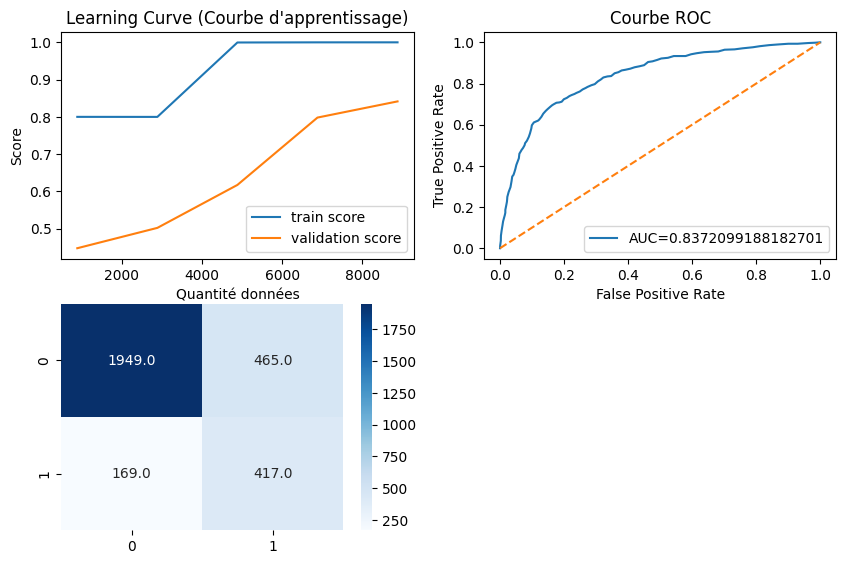

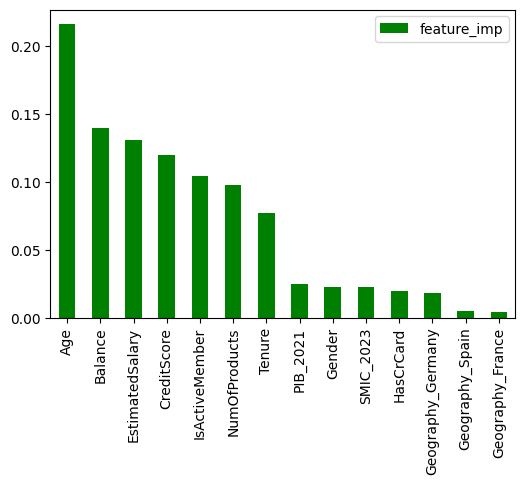

In [69]:
evaluation(random_forest,X_res,y_res)

Le score global du modèle est : 
0.7743333333333333

La matrice de confusion : 
[[1882  532]
 [ 145  441]]

ROC AUC Score : 0.7660893083859511

Reporting de prédiction : 
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2414
           1       0.45      0.75      0.57       586

    accuracy                           0.77      3000
   macro avg       0.69      0.77      0.71      3000
weighted avg       0.84      0.77      0.79      3000




array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

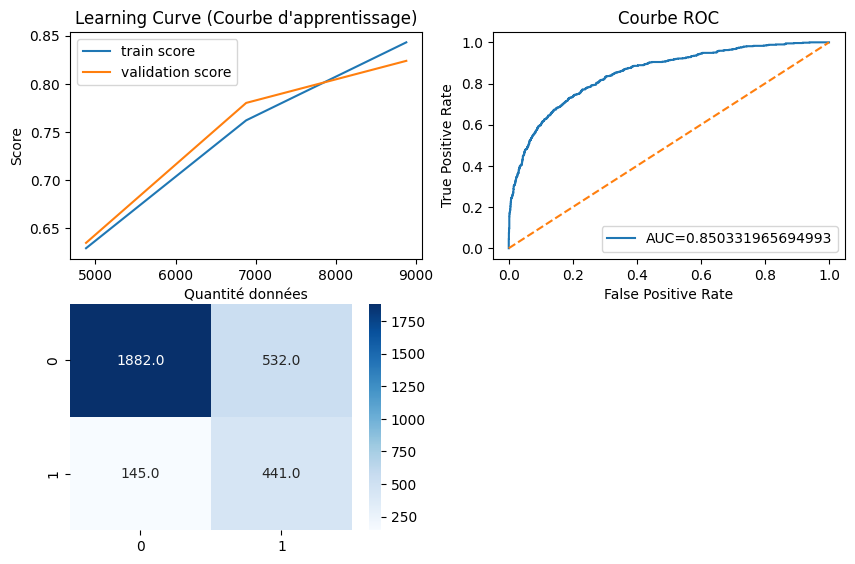

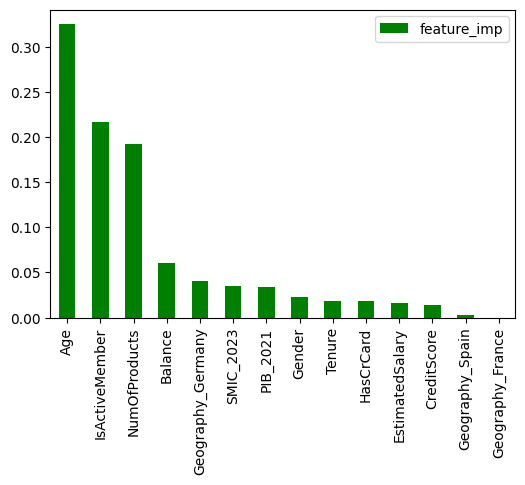

In [46]:
evaluation(gradient_boost,X_res,y_res)

Le score global du modèle est : 
0.748

La matrice de confusion : 
[[1795  619]
 [ 137  449]]

ROC AUC Score : 0.754895362942562

Reporting de prédiction : 
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      2414
           1       0.42      0.77      0.54       586

    accuracy                           0.75      3000
   macro avg       0.67      0.75      0.68      3000
weighted avg       0.83      0.75      0.77      3000




c:\users\pierre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\users\pierre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

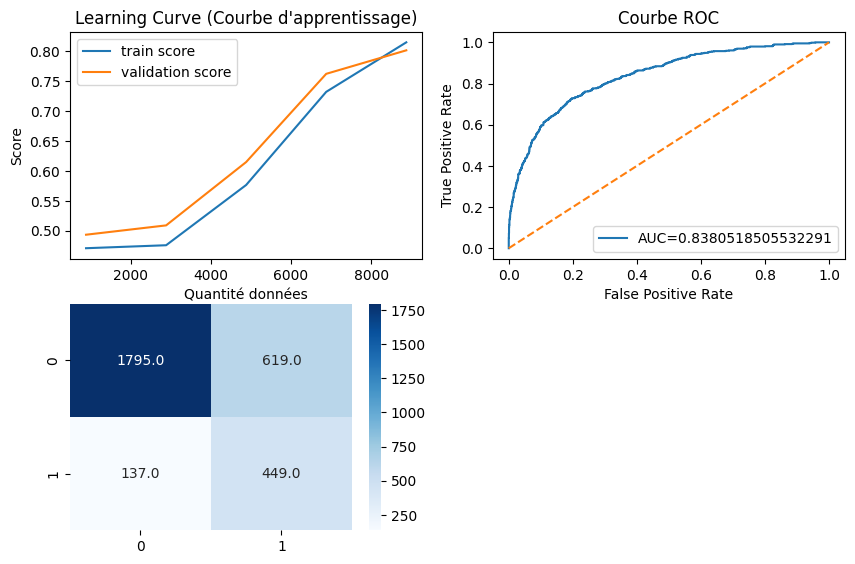

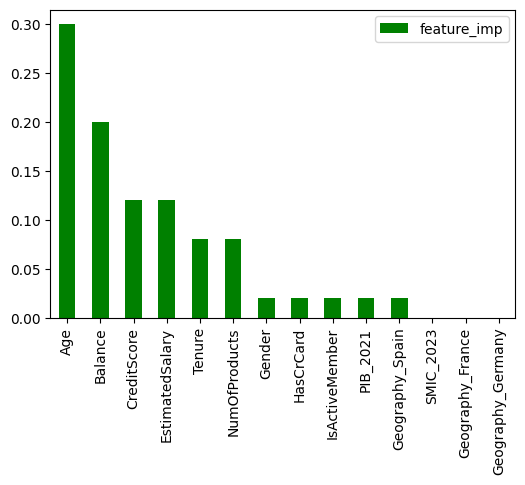

In [70]:
evaluation(ada_boost,X_res,y_res)

### Résultat du suréchantilonnage
Les résultats sur l'échantillonnage nous donne une approche différente sur la problématique.
En effet, nous avons plus ce ``trou dans la raquette`` (d'où la hausse du <b>recall</b>) qui nous faisait perdre des clients, mais par contre, nous avons désormais une détection "plus sensible", ce qui engendre une détection sur des clients "churn" qui sont en réalités des "non-churn".
Si l'intérêt business est d'éviter de perdre des clients, ce modèle peut être intéressant à prendre en compte.

# 5) Configuration du modèle

Je vais rester sur le ``Random Forest`` pour le moment car il a donné des bons résultats dans les analyses précédentes et reste un modèle assez simple à mettre en place. D'un point de vu "technique", nous pouvons également remarquer sur le ``Random Forest`` donne le meilleur compromis "score F1 / recall"

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

In [93]:
randomforest_grid = {'n_estimators':[150,175,200],
                     'min_samples_split':range(6,10)
                    }

In [83]:
def get_best_parameters(search_type,modele,params_criteria:dict):
    ''' Fonction permettant de déterminer les meilleurs paramètres d'un modèle par rapport "à la grille"
    de paramètres indiquée en entrée. Le "search_type" peut être GridSearchCV ou RandomizedSearchCV.
    '''
    my_bestparam_search = search_type(modele,params_criteria,scoring='f1')
    my_bestparam_search.fit(X_res, y_res)
    print("Les meilleurs hyper paramètres du modèle sont : " + str(my_bestparam_search.best_params_))
    return my_bestparam_search.best_params_

In [84]:
randomforest_bestparam = get_best_parameters(GridSearchCV,random_forest,randomforest_grid)

Les meilleurs hyper paramètres du modèle sont : {'min_samples_split': 6, 'n_estimators': 175}


In [101]:
random_forest_best = RandomForestClassifier(n_estimators=175,min_samples_split=6,random_state=26)

Le score global du modèle est : 
0.79

La matrice de confusion : 
[[1948  466]
 [ 164  422]]

ROC AUC Score : 0.7635479611255164

Reporting de prédiction : 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2414
           1       0.48      0.72      0.57       586

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.84      0.79      0.80      3000




c:\users\pierre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\users\pierre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


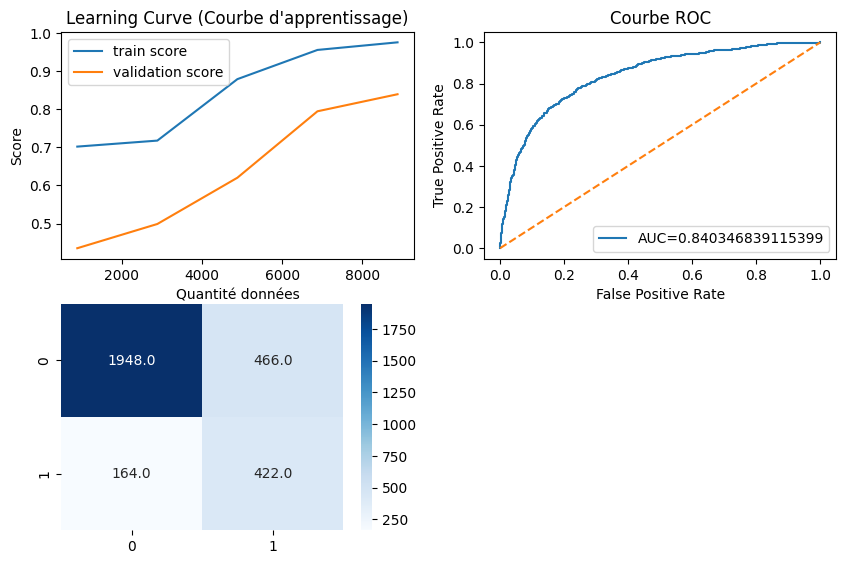

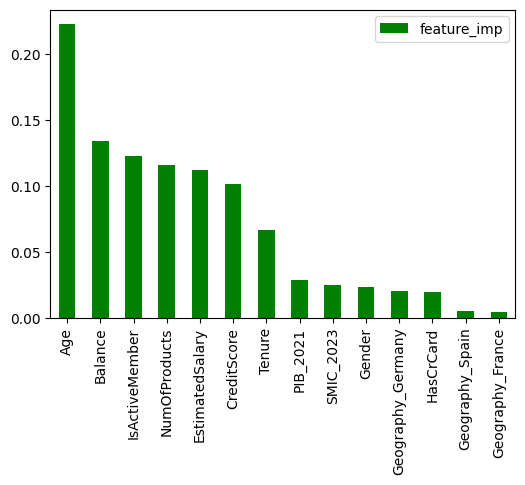

In [102]:
y_pred_best=evaluation(random_forest_best,X_res,y_res)

# Conclusion

Les caractéristiques les plus importantes pour lutter contre le churn sont :
- âge du client
- la somme sur son compte
- l'activité du client avec la banque
- le nombre de produit d'épargne détenu
- le salaire estimé du client

Les forêts aléatoires peuvent être un bon modèle pour prédire le churn des clients.

Les résultats mettent en avant qu'il faut investiguer les clients : 
- peu actif avec la banque, 
- possédant peu de diversité dans les produits bancaires (seulement un livret A par exemple)

Les clients sans argent sur leur compte (colonne ``balance = 0``) créé également un biais, puisque ce sont des clients qui n'utilise pas cette banque en tant que banque principale. Ils ne rentrent pas "directement" dans la case "client pouvant partir" car ils sont déjà pas ou très peu actif. La question qui peut se poser est : "serait-il intéressant de les démarcher pour les accompagner et leur permettre d'être plus actif avec la banque en les invitants à réaliser des projets avec cette banque (demande de financement, conseils d'épargnes, assurances...)

In [170]:
potential_churn = _invert_standard_scaled(X_test,standard_scaler)

In [171]:
potential_churn['predicted_values'] = y_pred_best

In [173]:
colonne_importante = ['Age','NumOfProducts','IsActiveMember','Balance','EstimatedSalary', 'CreditScore']

In [174]:
potential_churn = potential_churn.loc[potential_churn['predicted_values']==1,colonne_importante]

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'NumOfProducts'}>],
       [<AxesSubplot: title={'center': 'IsActiveMember'}>,
        <AxesSubplot: title={'center': 'Balance'}>],
       [<AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: title={'center': 'CreditScore'}>]], dtype=object)

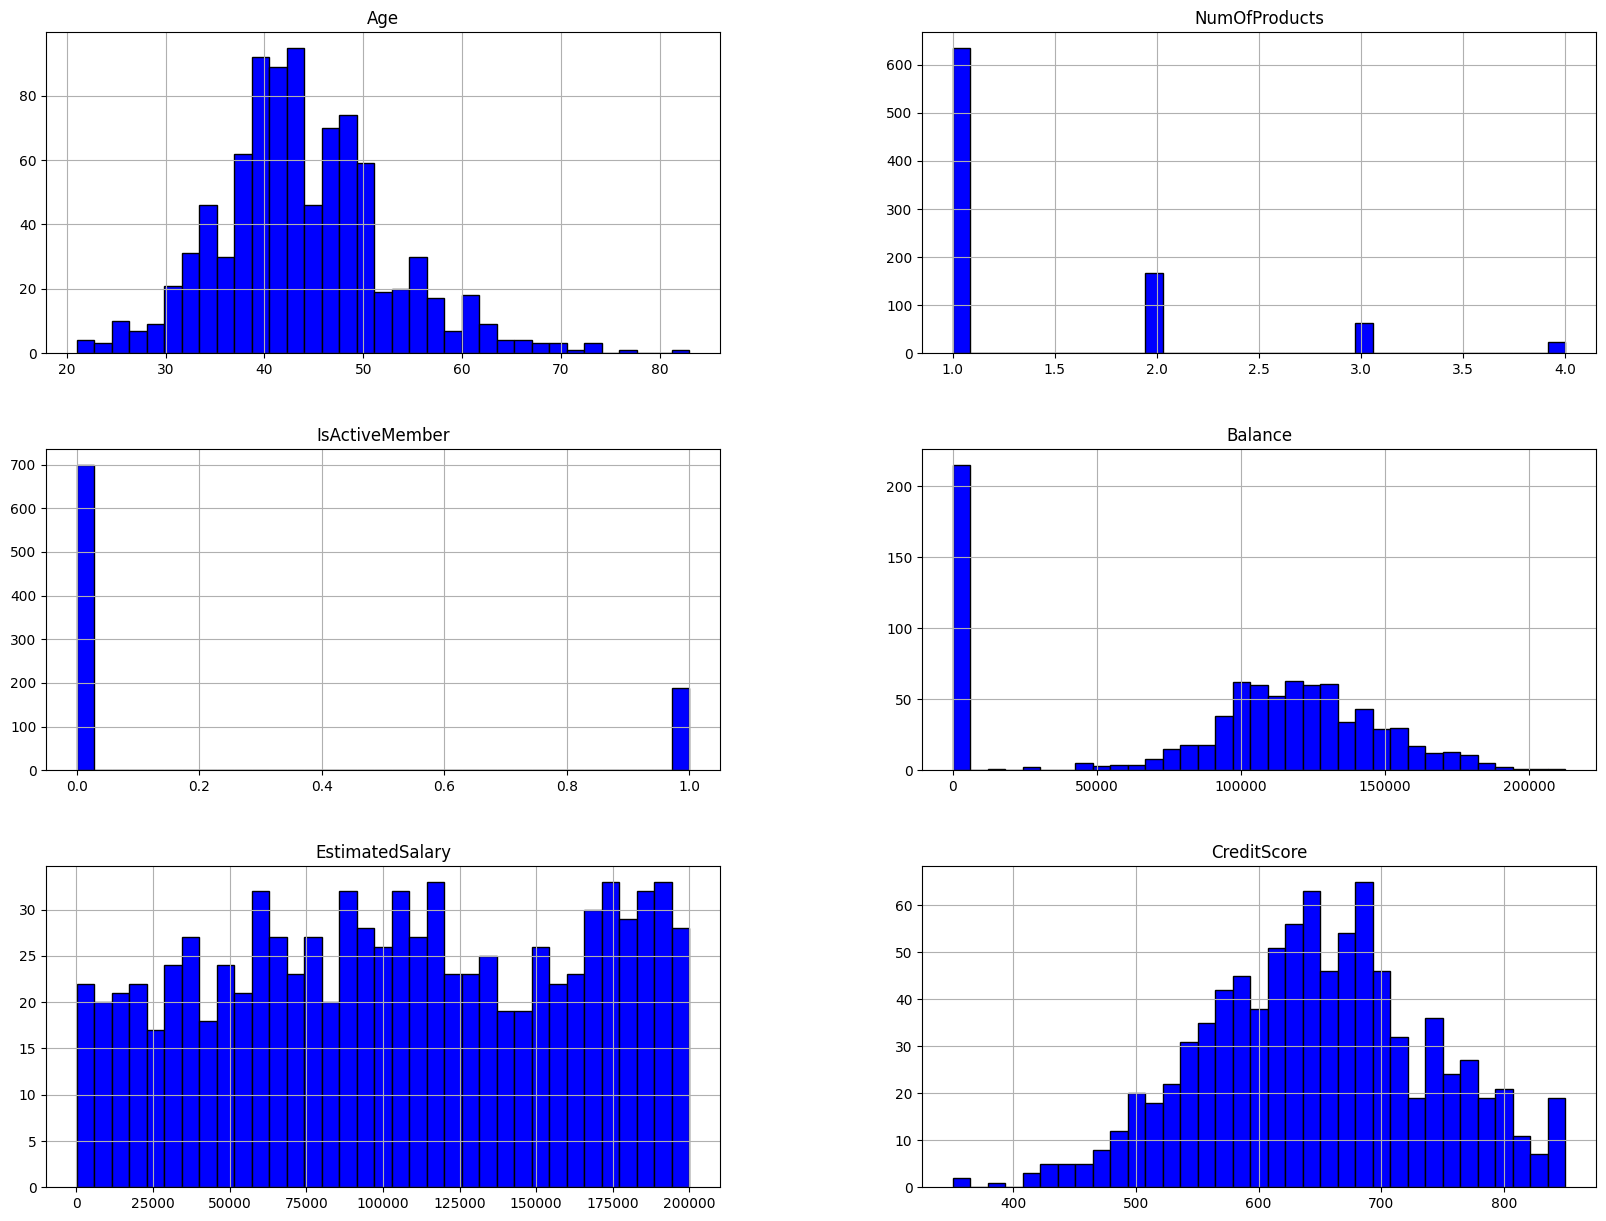

In [176]:
potential_churn.hist(bins=35, figsize=(20,15), color='blue',edgecolor='black')